In [1]:
import pandas as pd

# World Population Evolution

This notebook visualizes the evolution of world population by continent using World Bank data.

In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Load World Bank population data
# Using the World Bank API or pre-downloaded data
url = "https://raw.githubusercontent.com/datasets/population/master/data/population.csv"
df = pd.read_csv(url)

In [4]:
# Display the first few rows
df.head()

,Country Name,Country Code,Year,Value
0,Aruba,ABW,1960,54922.0
1,Aruba,ABW,1961,55578.0
2,Aruba,ABW,1962,56320.0
3,Aruba,ABW,1963,57002.0
4,Aruba,ABW,1964,57619.0


In [5]:
# Map countries to continents
continent_mapping = {
    'Asia': ['China', 'India', 'Indonesia', 'Pakistan', 'Bangladesh', 'Japan', 'Philippines', 
             'Vietnam', 'Turkey', 'Iran', 'Thailand', 'Myanmar', 'South Korea', 'Iraq', 'Afghanistan',
             'Saudi Arabia', 'Malaysia', 'Nepal', 'Yemen', 'North Korea'],
    'Africa': ['Nigeria', 'Ethiopia', 'Egypt', 'Congo', 'Tanzania', 'South Africa', 'Kenya', 
               'Uganda', 'Algeria', 'Sudan', 'Morocco', 'Angola', 'Ghana', 'Mozambique', 'Madagascar'],
    'Europe': ['Russia', 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Ukraine', 
               'Poland', 'Romania', 'Netherlands', 'Belgium', 'Greece', 'Portugal', 'Sweden'],
    'North America': ['United States', 'Mexico', 'Canada', 'Guatemala', 'Cuba', 'Haiti', 
                      'Dominican Republic', 'Honduras', 'Nicaragua', 'El Salvador'],
    'South America': ['Brazil', 'Colombia', 'Argentina', 'Peru', 'Venezuela', 'Chile', 
                      'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay'],
    'Oceania': ['Australia', 'Papua New Guinea', 'New Zealand', 'Fiji']
}

# Create reverse mapping
country_to_continent = {}
for continent, countries in continent_mapping.items():
    for country in countries:
        country_to_continent[country] = continent

In [6]:
# Add continent column
df['Continent'] = df['Country Name'].map(country_to_continent)

# Filter out rows without continent mapping
df_continents = df[df['Continent'].notna()].copy()

In [7]:
# Group by year and continent
population_by_continent = df_continents.groupby(['Year', 'Continent'])['Value'].sum().reset_index()

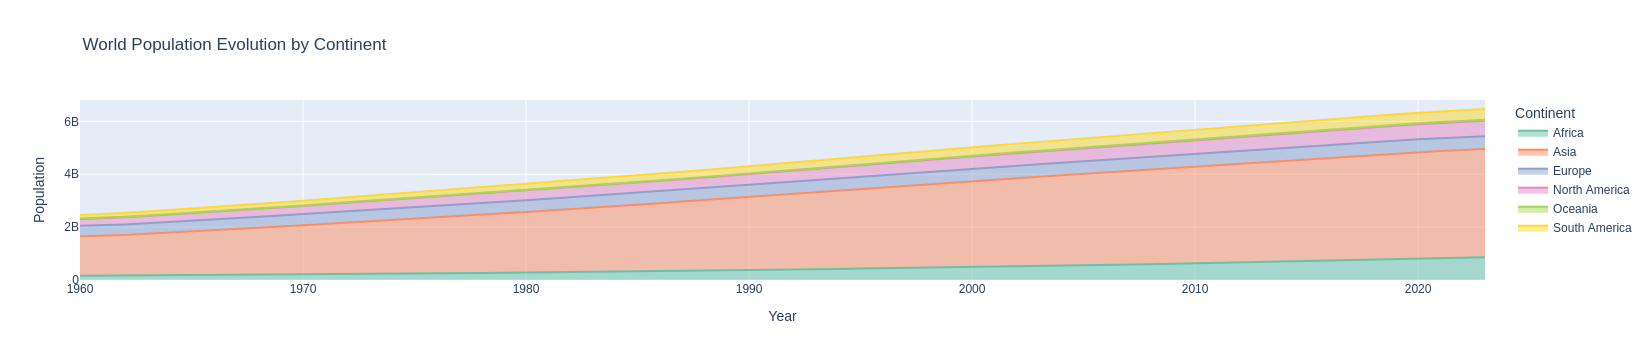

In [8]:
# Create stacked area chart
fig = px.area(
    population_by_continent,
    x='Year',
    y='Value',
    color='Continent',
    title='World Population Evolution by Continent',
    labels={'Value': 'Population', 'Year': 'Year'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    hovermode='x unified',
    yaxis_title='Population',
    xaxis_title='Year',
    legend_title='Continent'
)

fig.show()

In [9]:
# Summary statistics
print("\nTotal Population by Continent (Most Recent Year):")
latest_year = population_by_continent['Year'].max()
latest_data = population_by_continent[population_by_continent['Year'] == latest_year]
print(latest_data.sort_values('Value', ascending=False).to_string(index=False))


Total Population by Continent (Most Recent Year):
 Year     Continent        Value
 2023          Asia 4098799244.0
 2023        Africa  859688658.0
 2023 North America  580643935.0
 2023        Europe  481923474.0
 2023 South America  402961203.0
 2023       Oceania   43195828.0
